# Import Libraries

In [1]:
# Import data analysis and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV and Excel files into respective paths
file_paths = {
    'global_time_trend': '/content/IHME_GBD_2021_TB_INCIDENCE_MORTALITY_GLOBAL_TIME_TREND_Y2024M03D19.CSV',
    'top20_time_trend': '/content/IHME_GBD_2021_TB_INCIDENCE_MORTALITY_TOP20_TIME_TREND_Y2024M03D19.XLSX',
    'mortality_risk': '/content/IHME_GBD_2021_TB_MORTALITY_RISK_Y2024M03D19.XLSX',
    'country_data': '/content/IHME_GBD_2021_TB_INCIDENCE_MORTALITY_COUNTRY_Y2024M03D19.CSV',
    'county_data': '/content/IHME_GBD_2021_TB_INCIDENCE_MORTALITY_COUNTY_Y2024M03D19.XLSX',
}

In [3]:
# Reading the files into dataframes
global_time_trend = pd.read_csv(file_paths['global_time_trend'], encoding='latin1')
top20_time_trend_incidence_rate = pd.read_excel(file_paths['top20_time_trend'], sheet_name='incidence_rate')
top20_time_trend_mortality_count = pd.read_excel(file_paths['top20_time_trend'], sheet_name='mortality_count')
mortality_risk = pd.read_excel(file_paths['mortality_risk'], sheet_name='2021')
country_data = pd.read_csv(file_paths['country_data'], encoding='latin1')
county_data = pd.read_excel(file_paths['county_data'], sheet_name='in')

# 1.0 Exploratory Data Analysis

## <font color='cyan'>Data Frame: global_time_trend</font>

In [4]:
# Check the global_time_trend dataframe head
global_time_trend.head()

,age_group,sex_id,year_id,location_id,mean,lower,upper,inc_target,Sex,metric
0,15 to 49,1,1990,1,0.000903,0.000745,0.001086,0.000587,Male,incidence
1,15 to 49,1,1995,1,0.000959,0.000808,0.001137,0.000587,Male,incidence
2,15 to 49,1,2000,1,0.000958,0.000815,0.001141,0.000587,Male,incidence
3,15 to 49,1,2005,1,0.000923,0.000787,0.001102,0.000587,Male,incidence
4,15 to 49,1,2010,1,0.000815,0.000699,0.000978,0.000587,Male,incidence


In [5]:
# Check the size of global_time_trend
global_time_trend.shape

(492, 10)

In [6]:
# Ensure that the 'year_id' column is of type int
global_time_trend['year_id'] = global_time_trend['year_id'].astype(int)

In [7]:
# Function to plot time trends for incidence and mortality by age group
def plot_time_trend_by_age_group(data, metric, title):
    for age_group in data['age_group'].unique():
        plt.figure(figsize=(12, 6))
        subset = data[(data['metric'] == metric) & (data['age_group'] == age_group)]
        for sex in subset['Sex'].unique():
            sex_subset = subset[subset['Sex'] == sex]
            plt.plot(sex_subset['year_id'], sex_subset['mean'], label=f'{sex}')
        plt.xlabel('Year')
        plt.ylabel('Mean Rate')
        plt.title(f'{title} for Age Group: {age_group}')
        plt.legend()
        plt.grid(True)
        plt.show()

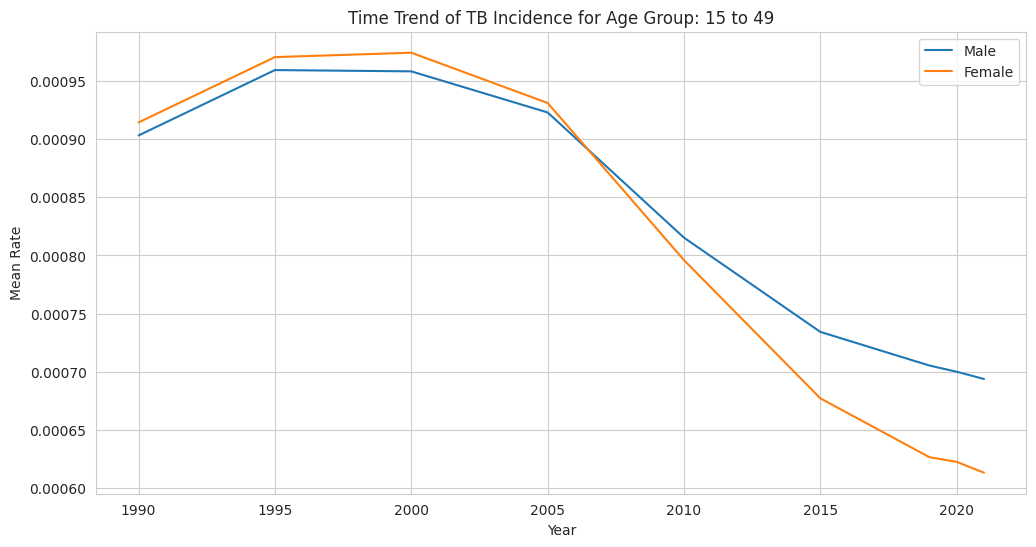

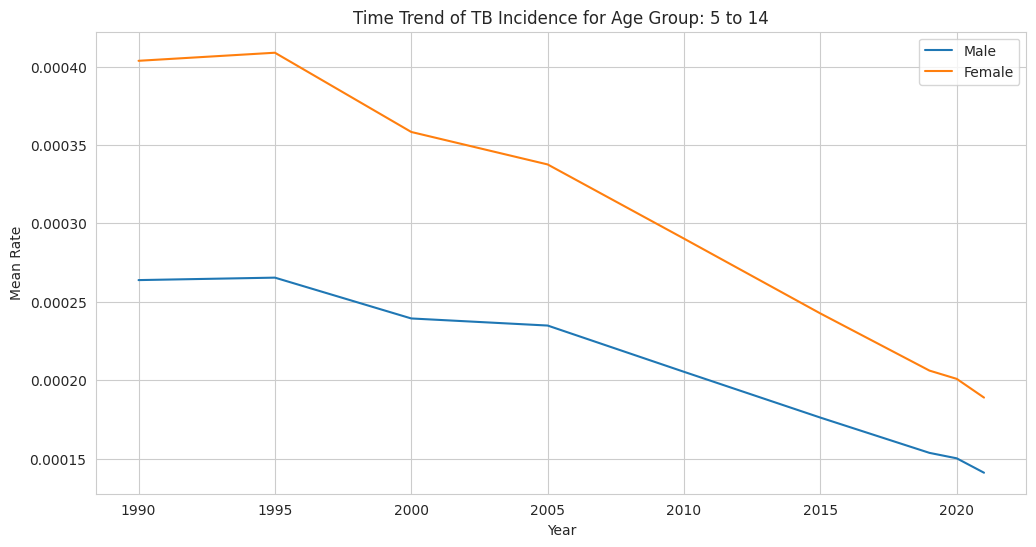

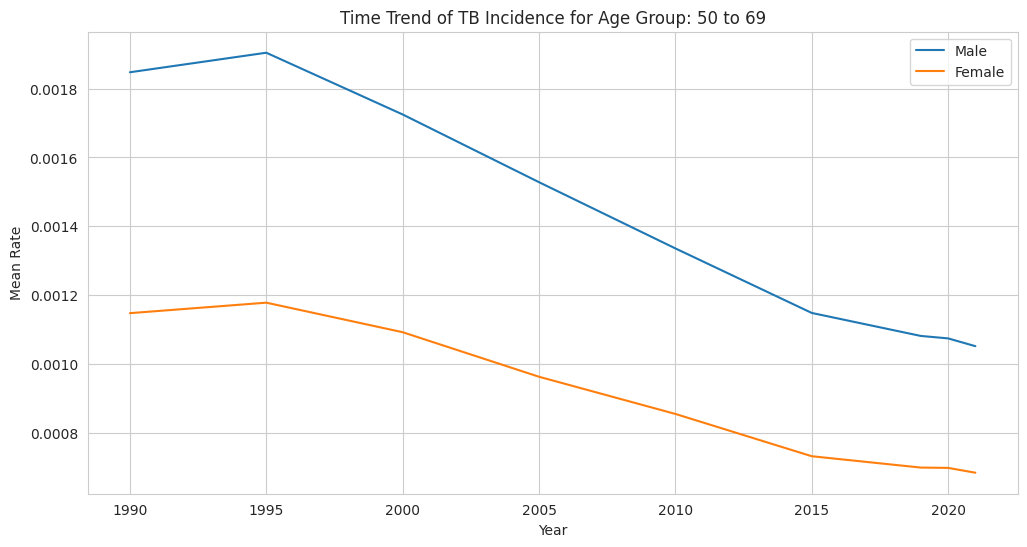

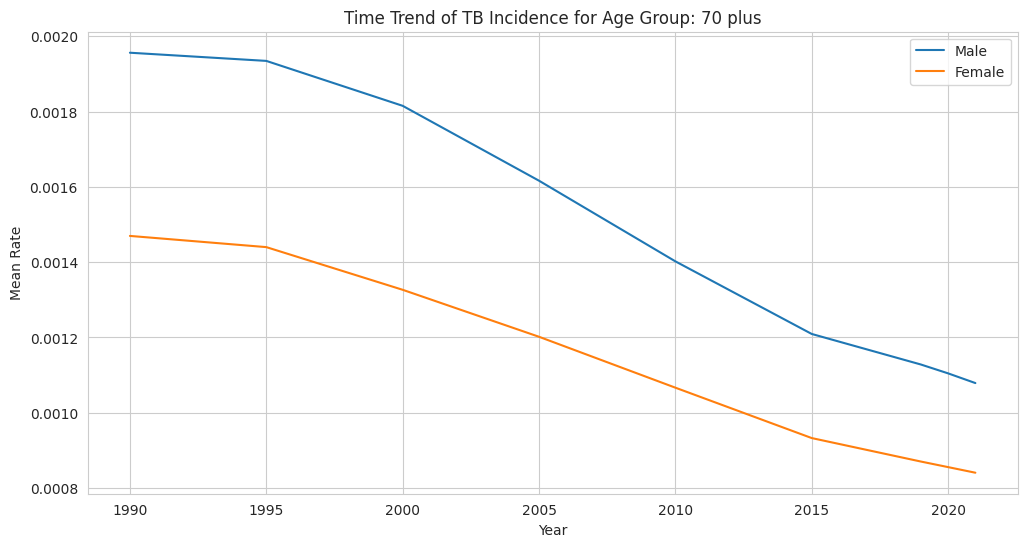

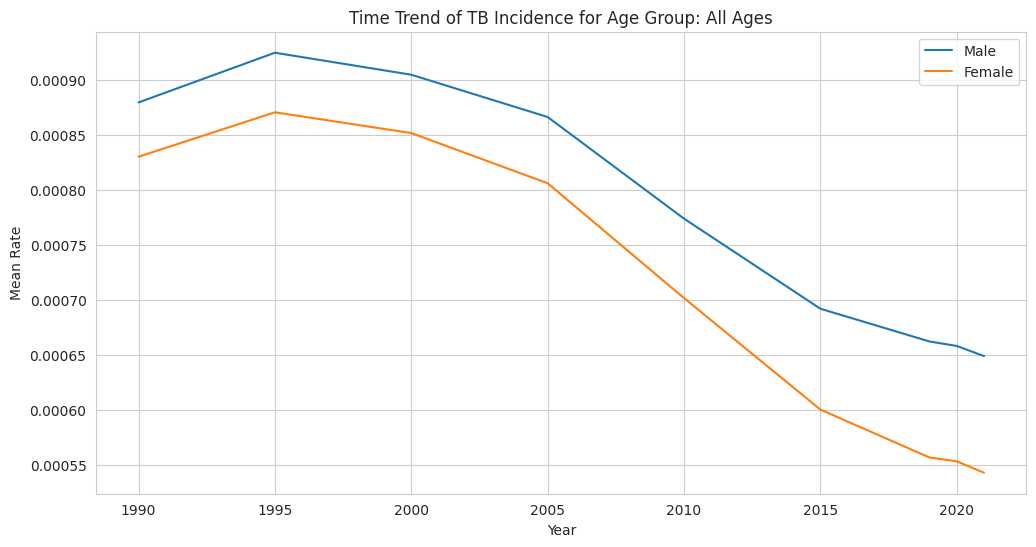

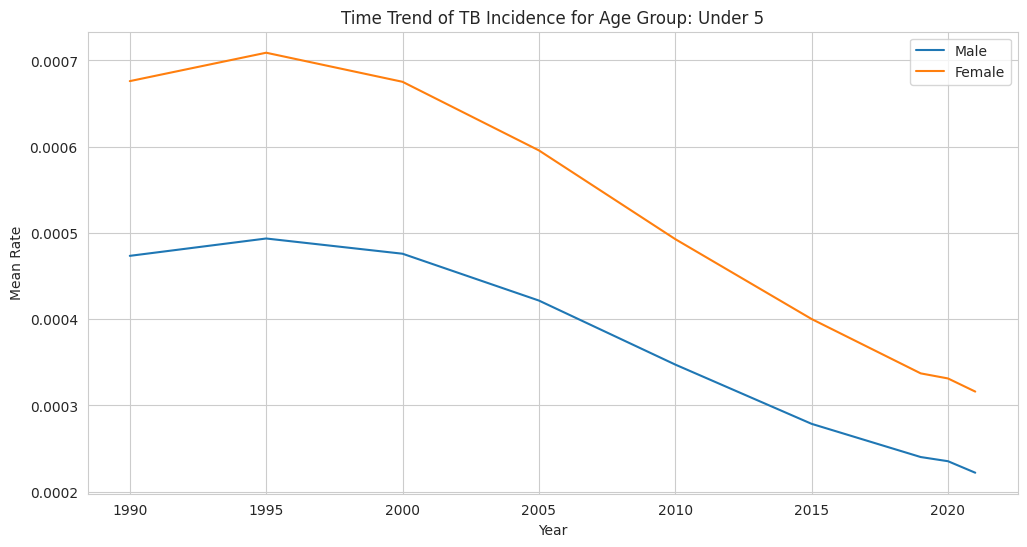

In [8]:
# Plotting the time trend for incidence rate based on age_group
plot_time_trend_by_age_group(global_time_trend, 'incidence', 'Time Trend of TB Incidence')

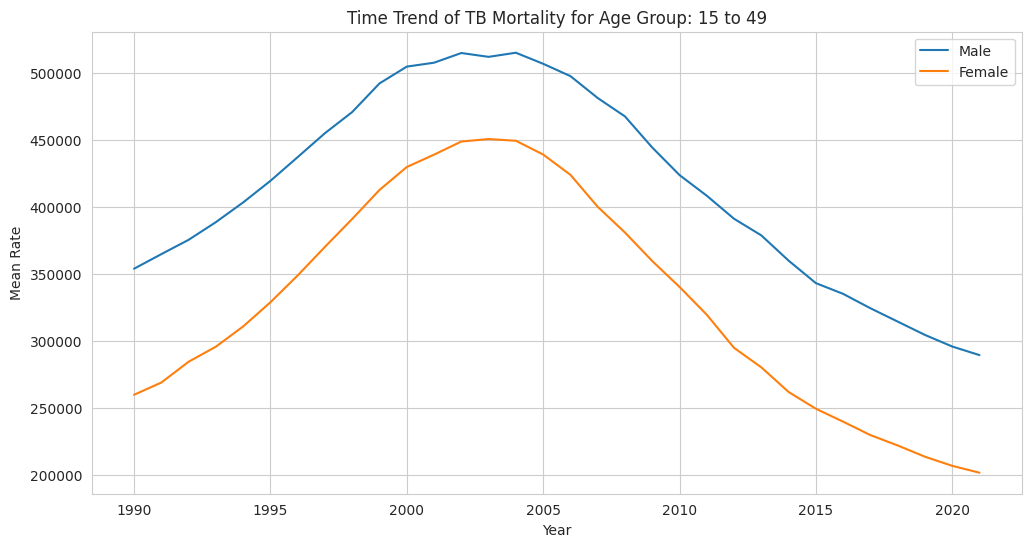

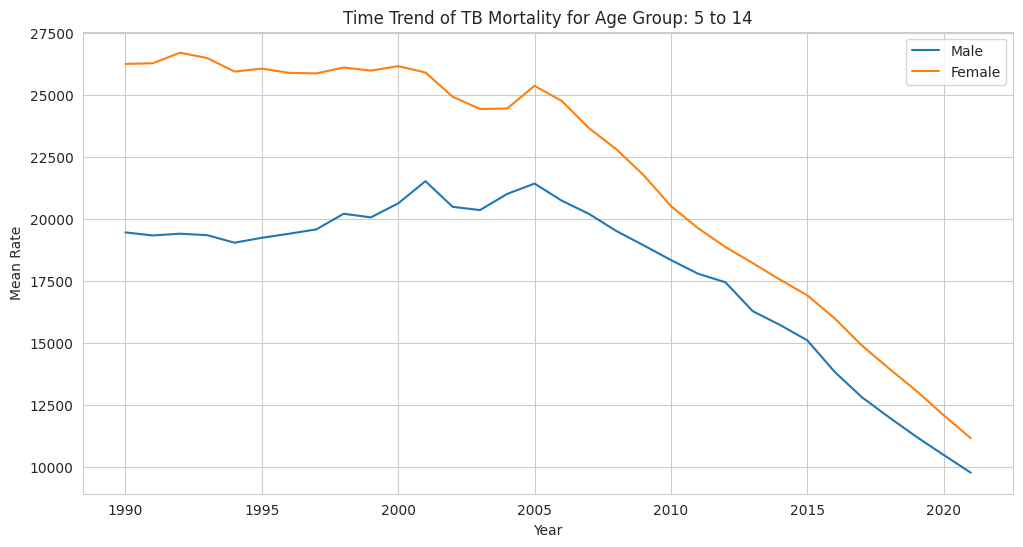

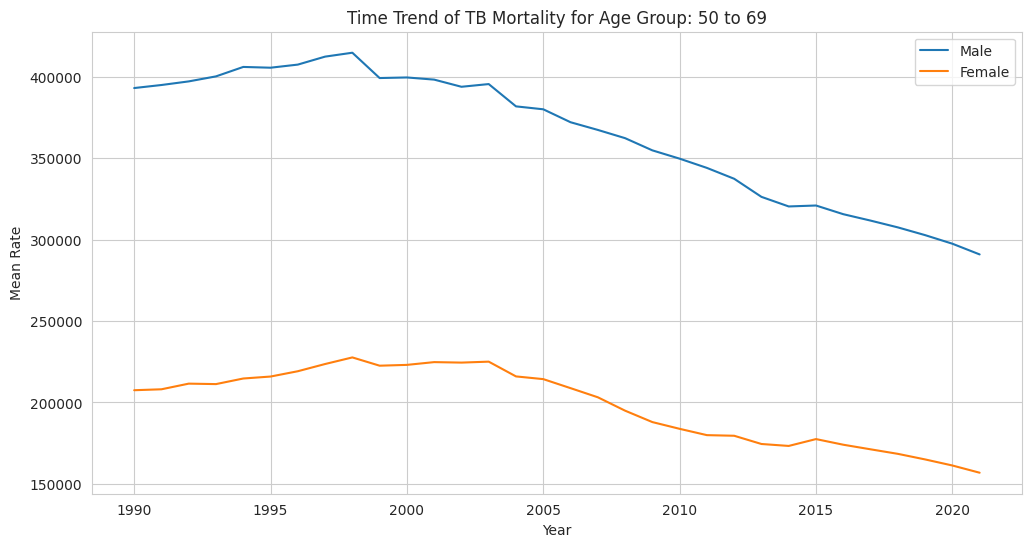

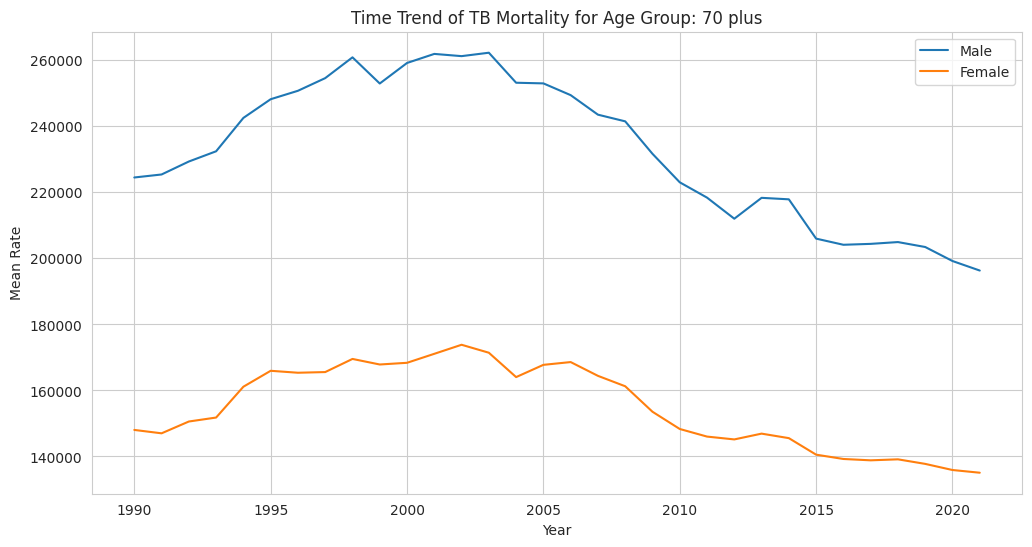

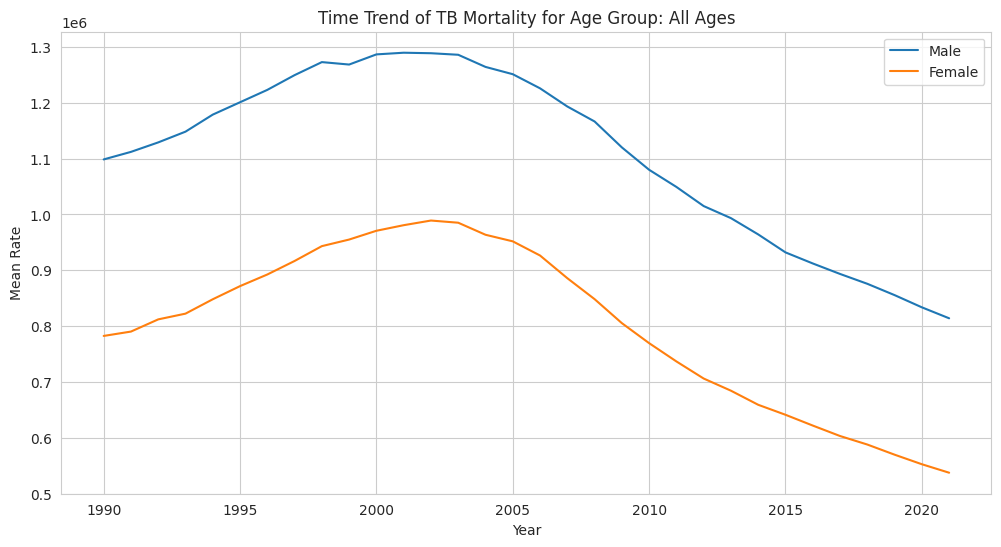

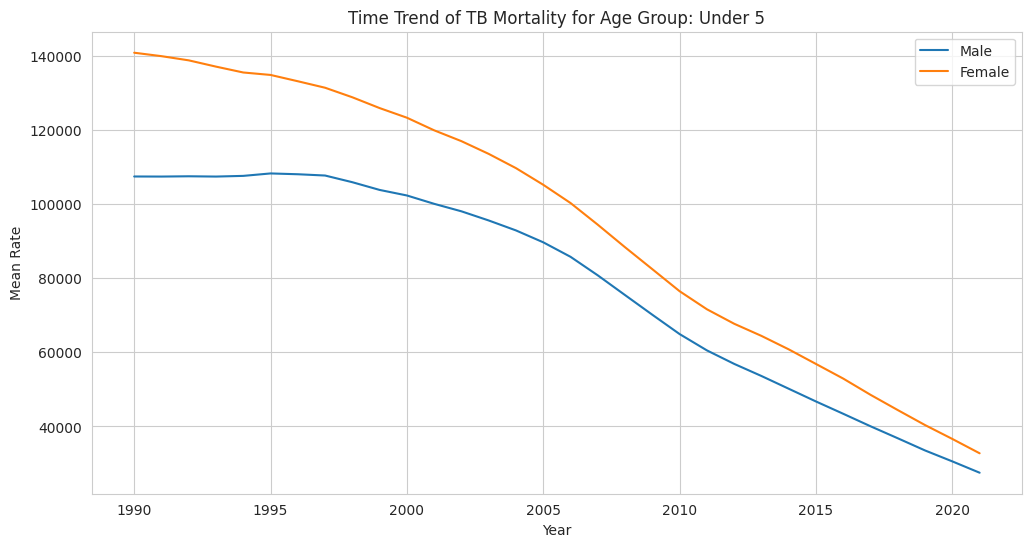

In [9]:
# Plotting the time trend for mortality count based on age_group
plot_time_trend_by_age_group(global_time_trend, 'mortality', 'Time Trend of TB Mortality')

In [10]:
# Function to plot actual rates vs. target rates by age group
def plot_actual_vs_target_by_age_group(data, metric, title):
    for age_group in data['age_group'].unique():
        plt.figure(figsize=(12, 6))
        subset = data[(data['metric'] == metric) & (data['age_group'] == age_group)]
        for sex in subset['Sex'].unique():
            sex_subset = subset[subset['Sex'] == sex]
            plt.plot(sex_subset['year_id'], sex_subset['mean'], label=f'{sex} (Actual)')
            plt.plot(sex_subset['year_id'], sex_subset['inc_target'], label=f'{sex} (Target)', linestyle='--')
        plt.xlabel('Year')
        plt.ylabel('Rate')
        plt.title(f'{title} for Age Group: {age_group}')
        plt.legend()
        plt.grid(True)
        plt.show()

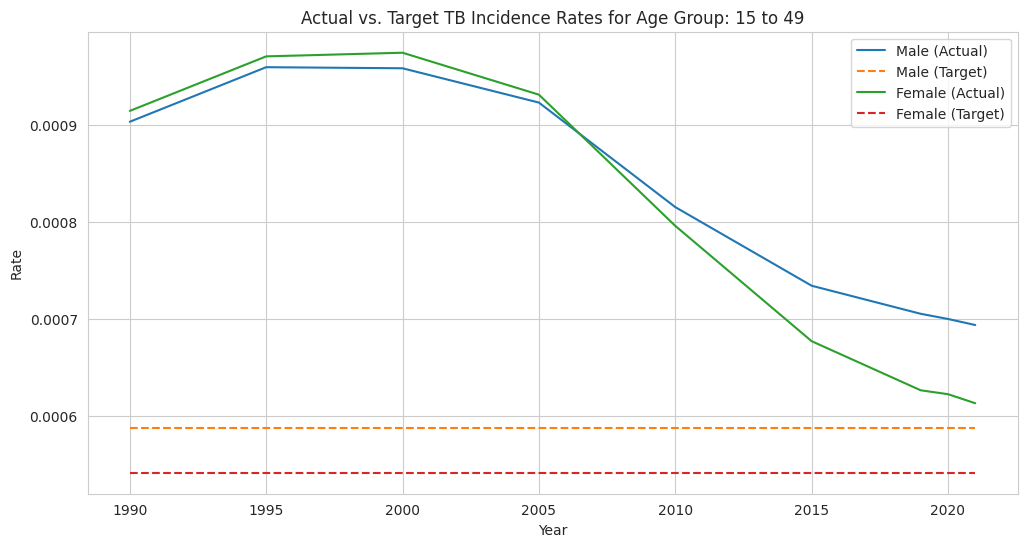

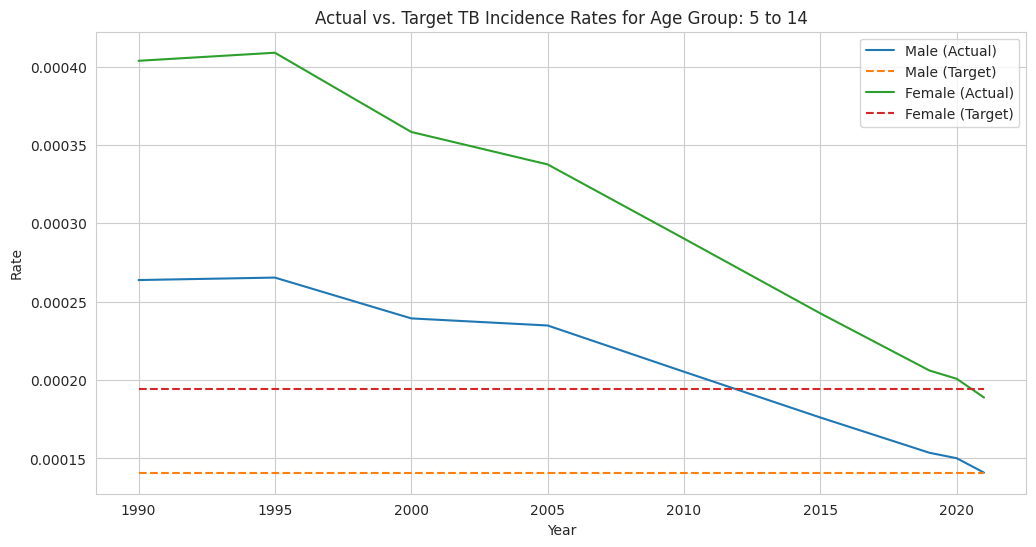

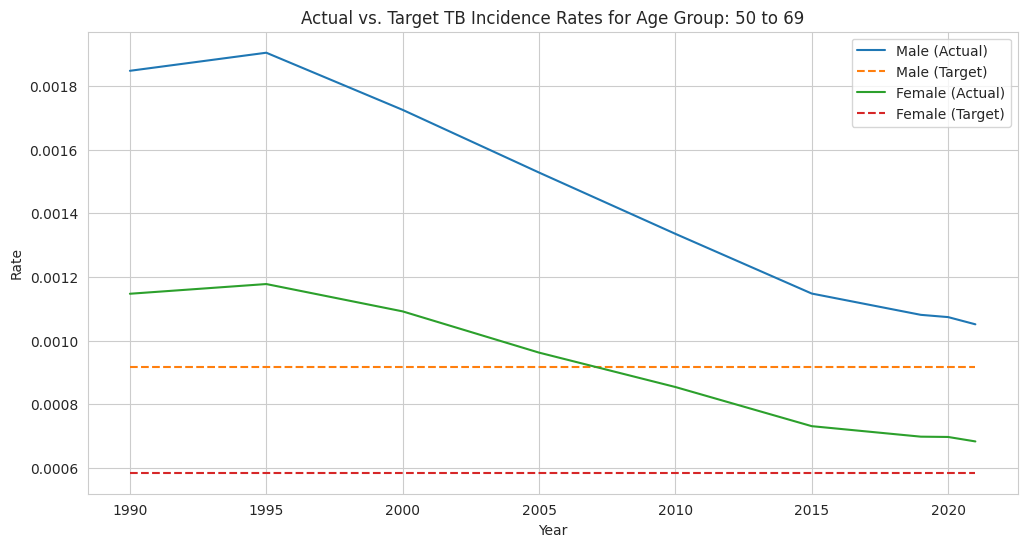

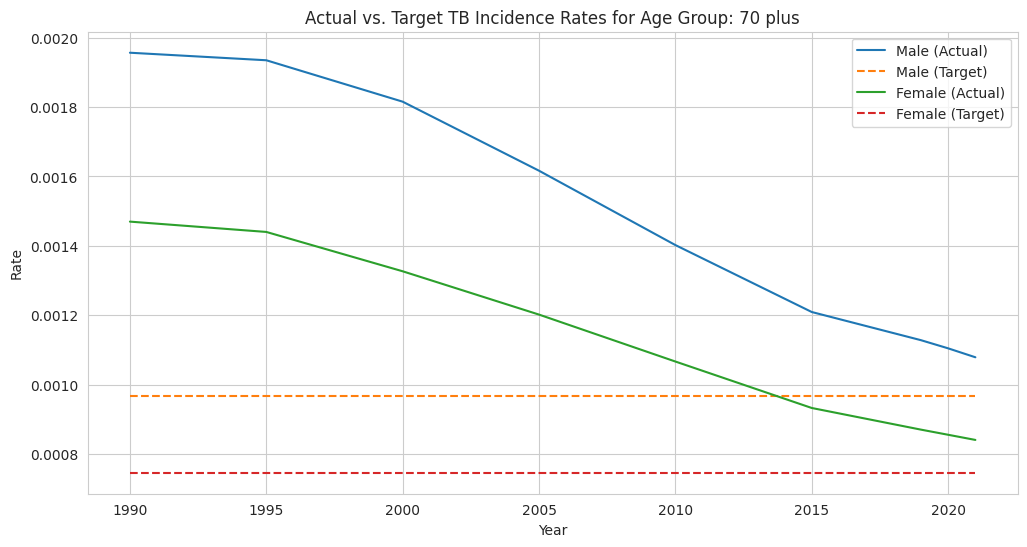

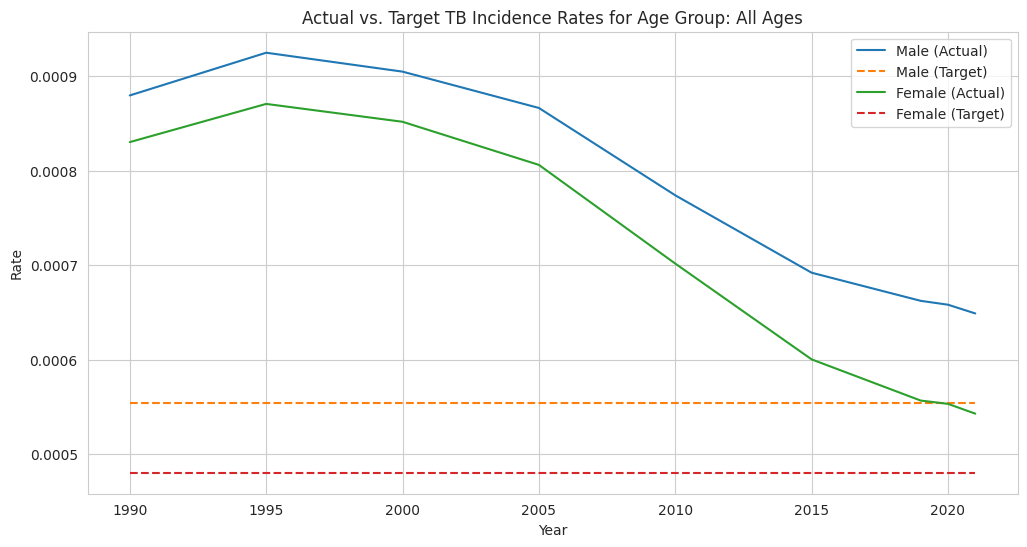

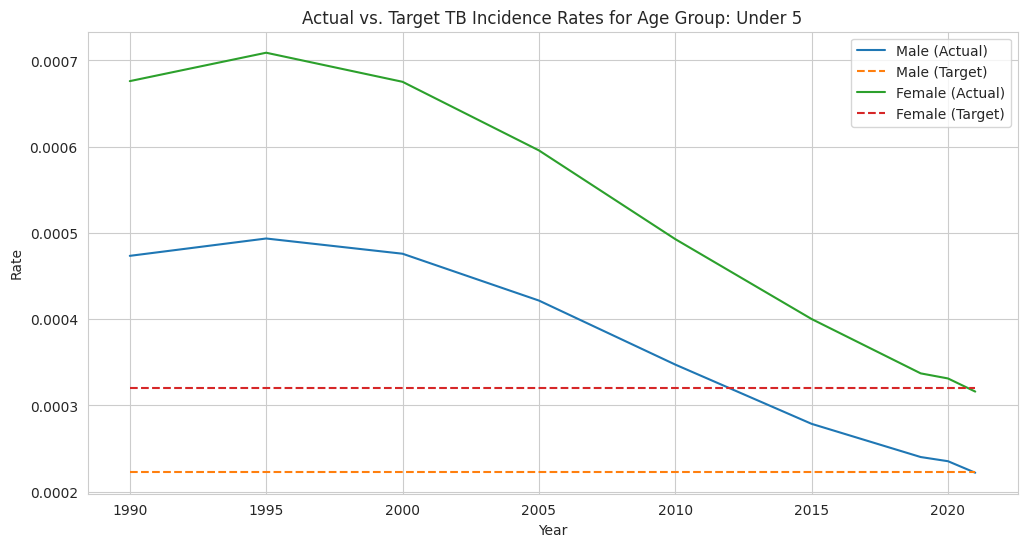

In [11]:
# Plot the actual vs the target incidence rate based on each age_group
plot_actual_vs_target_by_age_group(global_time_trend, 'incidence', 'Actual vs. Target TB Incidence Rates')

## <font color='cyan'>Data Frame: top20_time_trend_incidence_rate </font>

In [12]:
# Check the top20_time_trend_incidence_rate
top20_time_trend_incidence_rate.head()

,location_name,location_id,year_id,measure_id,metric,mean,lower,upper
0,Angola,168,1990,6,rates,419.356963,373.227135,464.400516
1,Angola,168,1995,6,rates,426.535132,380.629022,482.265747
2,Angola,168,2000,6,rates,427.393978,384.340221,480.712786
3,Angola,168,2005,6,rates,412.114211,370.515069,455.594008
4,Angola,168,2010,6,rates,373.508752,333.843885,418.517954


In [13]:
# Check the size of top20_time_trend_incidence_rate
top20_time_trend_incidence_rate.shape

(180, 8)

In [14]:
# Create an interactive line chart using Plotly
fig = px.line(top20_time_trend_incidence_rate,
              x='year_id',
              y='mean',
              color='location_name',
              title='Trend of TB Incidence Rate Over Time',
              labels={'year_id': 'Year', 'mean': 'Incidence Rate (per 100,000)', 'location_name': 'Location'},
              markers=True)

# Show the plot
fig.show()

## <font color='cyan'>Data Frame: top20_time_trend_mortality_count </font>

In [15]:
# Check the top20_time_trend_mortality_count
top20_time_trend_mortality_count.head()

,location_name,location_id,year_id,measure_id,metric,mean,lower,upper
0,Angola,168,1990,1,number,13489.587161,9625.101278,17007.956087
1,Angola,168,1991,1,number,13748.861458,9876.046474,17117.313258
2,Angola,168,1992,1,number,14044.363510,9850.857119,17356.307569
3,Angola,168,1993,1,number,14669.796792,10290.243083,18217.963267
4,Angola,168,1994,1,number,15286.196028,10769.885695,19146.761698


In [16]:
# Check the size of top20_time_trend_mortality_count
top20_time_trend_mortality_count.shape

(640, 8)

In [17]:
# Create an interactive line chart using Plotly
fig = px.line(top20_time_trend_mortality_count,
              x='year_id',
              y='mean',
              color='location_name',
              title='Trend of TB Mortality Count Over Time',
              labels={'year_id': 'Year', 'mean': 'Mortality Count', 'location_name': 'Location'},
              markers=True)

# Show the plot
fig.show()

## <font color='cyan'>Data Frame: country_data </font>

In [18]:
# Check the country data
country_data.head()

,location_id,age_group_id,year_id,metric_name,measure_name,sex_id,mean,lower,upper,age_group_name,location_name
0,6,1,2021,rate,mortality,3,0.340393,0.277540,0.425089,<5,China
1,6,1,2021,rate,incidence,3,12.621468,10.613406,15.666339,<5,China
2,6,23,2021,rate,mortality,3,0.056359,0.047962,0.070500,5 to 14,China
3,6,23,2021,rate,incidence,3,7.877933,5.665043,10.992498,5 to 14,China
4,6,24,2021,rate,mortality,3,1.077514,0.868527,1.461333,15-49,China


In [19]:
# Check the shape of the country_data
country_data.shape

(2040, 11)

In [20]:
# Filter data for the measure type 'incidence' and sex 'both' (sex_id=3)
incidence_data = country_data[(country_data['measure_name'] == 'incidence') & (country_data['sex_id'] == 3)]

# Create a choropleth map for TB incidence rates
fig = px.choropleth(incidence_data,
                    locations="location_name",
                    locationmode="country names",
                    color="mean",
                    hover_name="location_name",
                    color_continuous_scale="Viridis",
                    title="Global TB Incidence Rates by Country (2021)",
                    labels={'mean': 'Incidence Rate (per 100,000)'})

# Display the map
fig.show()

In [21]:
# Filter data for the measure type 'mortality' and sex 'both' (sex_id=3)
mortality_data = country_data[(country_data['measure_name'] == 'mortality') & (country_data['sex_id'] == 3)]

# Create a choropleth map for TB mortality rates
fig = px.choropleth(mortality_data,
                    locations="location_name",
                    locationmode="country names",
                    color="mean",
                    hover_name="location_name",
                    color_continuous_scale="Reds",
                    title="Global TB Mortality Rates by Country (2021)",
                    labels={'mean': 'Mortality Rate (per 100,000)'})

# Display the map
fig.show()

In [22]:
# Aggregate data by age group
incidence_by_age = incidence_data.groupby('age_group_name')['mean'].mean().reset_index()
mortality_by_age = mortality_data.groupby('age_group_name')['mean'].mean().reset_index()

# Merge the incidence and mortality data on age group
age_data = pd.merge(incidence_by_age, mortality_by_age, on='age_group_name', suffixes=('_incidence', '_mortality'))

# Plot the data
fig = go.Figure()

# Add incidence data to the plot
fig.add_trace(go.Bar(
    x=age_data['age_group_name'],
    y=age_data['mean_incidence'],
    name='Incidence Rate',
    marker_color='blue'
))

# Add mortality data to the plot
fig.add_trace(go.Bar(
    x=age_data['age_group_name'],
    y=age_data['mean_mortality'],
    name='Mortality Rate',
    marker_color='red'
))

# Update the layout
fig.update_layout(
    title='Age-wise TB Incidence and Mortality Rates (2021)',
    xaxis_title='Age Group',
    yaxis_title='Rate (per 100,000)',
    barmode='group'
)

## <font color='cyan'> Data Frame: mortality_risk</font>

In [23]:
# Check the mortality_risk
mortality_risk.head()

,location_name,location_type,age_group_name,location_id,mort_2015_count_mean,mort_2015_count_lower,mort_2015_count_upper,mort_2021_count_mean,mort_2021_count_lower,mort_2021_count_upper,...,rmv_upper_smoking,rmv_mean_alcohol,rmv_lower_alcohol,rmv_upper_alcohol,rmv_mean_diabetes,rmv_lower_diabetes,rmv_upper_diabetes,rmv_mean_all_risk,rmv_lower_all_risk,rmv_upper_all_risk
0,Global,global,All Ages,1,1.575213e+06,1.452860e+06,1.697411e+06,1.368210e+06,1.244993e+06,1.536771e+06,...,1.394632e+06,1.232482e+06,886424.1432,1.560003e+06,1.220031e+06,1.101365e+06,1.393987e+06,986655.0202,697402.42430,1.225183e+06
1,Global,global,15-49 years,1,5.927200e+05,5.336074e+05,6.500239e+05,4.919816e+05,4.395550e+05,5.466225e+05,...,4.993489e+05,4.432311e+05,320822.6459,5.638332e+05,4.816657e+05,4.298471e+05,5.365812e+05,400143.2928,292322.28660,4.980396e+05
2,Global,global,50-69 years,1,4.972750e+05,4.661338e+05,5.265154e+05,4.503313e+05,4.064675e+05,5.127262e+05,...,4.490431e+05,3.957861e+05,258953.9354,5.262099e+05,3.913307e+05,3.518403e+05,4.520796e+05,291664.4140,186077.85360,3.861404e+05
3,Global,global,70+ years,1,3.471596e+05,3.223117e+05,3.684045e+05,3.429330e+05,3.122226e+05,3.928769e+05,...,3.510116e+05,3.105013e+05,218761.8396,3.955342e+05,2.640714e+05,2.384060e+05,3.222473e+05,211883.7906,137207.08160,2.731437e+05
4,"Southeast Asia, East Asia, and Oceania",superregion,All Ages,4,2.655287e+05,2.479678e+05,2.862395e+05,2.352683e+05,2.152546e+05,2.781593e+05,...,2.243927e+05,2.098368e+05,145521.6424,2.843888e+05,2.039574e+05,1.851880e+05,2.407046e+05,146988.4230,98981.12388,2.037733e+05


In [24]:
# Filter the data for 'Global' location
global_data = mortality_risk[mortality_risk['location_name'] == 'Global']

# Prepare data for plotting
mortality_counts = global_data[['age_group_name', 'mort_2015_count_mean', 'mort_2021_count_mean']].melt(id_vars='age_group_name',
                                                                                                        var_name='Year',
                                                                                                        value_name='Mortality Count')
mortality_counts['Year'] = mortality_counts['Year'].str.replace('mort_', '').str.replace('_count_mean', '')

# Plot the data
fig1 = px.bar(mortality_counts, x='age_group_name', y='Mortality Count', color='Year', barmode='group',
              title='Global TB Mortality Counts for 2015 and 2021',
              labels={'age_group_name': 'Age Group', 'Mortality Count': 'Mortality Count'})
fig1.show()

In [25]:
# Prepare data for plotting risk-attributable mortality counts
risk_factors = ['rmv_mean_smoking', 'rmv_mean_alcohol', 'rmv_mean_diabetes']
risk_data = global_data[['age_group_name'] + risk_factors].melt(id_vars='age_group_name',
                                                                var_name='Risk Factor',
                                                                value_name='Mortality Count')
risk_data['Risk Factor'] = risk_data['Risk Factor'].str.replace('rmv_mean_', '')

# Plot the data
fig2 = px.bar(risk_data, x='age_group_name', y='Mortality Count', color='Risk Factor', barmode='group',
              title='Risk-attributable TB Mortality Counts for 2021',
              labels={'age_group_name': 'Age Group', 'Mortality Count': 'Mortality Count'})
fig2.show()

In [26]:
# Select a few key regions for comparison
regions = ['Global', 'Southeast Asia, East Asia, and Oceania', 'Sub-Saharan Africa', 'Latin America and Caribbean', 'North Africa and Middle East']

# Filter the data for the selected regions
region_data = mortality_risk[mortality_risk['location_name'].isin(regions)]

# Prepare data for plotting
region_mortality = region_data[['location_name', 'age_group_name', 'mort_2021_count_mean']]

# Plot the data
fig3 = px.bar(region_mortality, x='age_group_name', y='mort_2021_count_mean', color='location_name', barmode='group',
              title='TB Mortality Counts for 2021 by Region and Age Group',
              labels={'age_group_name': 'Age Group', 'mort_2021_count_mean': 'Mortality Count', 'location_name': 'Region'})
fig3.show()

# 2.0 Data Modelling

This research on TB incidence and mortality utilizes three specific datasets from the GBD 2021 TB Estimates. Each dataset offers unique strengths that contribute to the overall robustness and scope of the analysis:
1.	`Global Time Trend Data:` The global_time_trend dataset serves as the foundation for modeling global TB trends. Its rich historical data encompasses multiple years, age groups, sexes, and locations. This comprehensive structure allows for:
  * Identifying long-term trends and patterns in TB rates.
  * Evaluating the effectiveness of past TB control measures.
  * Predicting future trends to inform public health strategies.

2. `Country Data:` The country_data dataset provides in-depth information across various countries. It includes:
  * Comprehensive coverage of multiple countries, facilitating global analysis.
  * Detailed breakdowns by age group and sex for targeted analysis.
  * Mean rates and confidence intervals to enhance the reliability of predictions.

3. `Mortality Risk Data:` The mortality_risk dataset focuses on TB mortality across various locations. It incorporates data on significant risk factors such as alcohol use, smoking, and diabetes. This information is crucial for:
  * Understanding the broader impact of TB beyond case numbers.
  * Identifying key trends and patterns in TB-related mortality.
  * Developing targeted public health interventions based on mortality risk factors




In [27]:
# Create a copy of dataframe for modelling
df_global = global_time_trend.copy()
df_country = country_data.copy()
df_risk = mortality_risk.copy()

In [28]:
# Check the missing values within the data frame
print(df_global.isnull().sum()) # inc_target with NaN are all based on `mortality` metric
print(df_country.isnull().sum())
print(df_risk.isnull().sum())

age_group        0
sex_id           0
year_id          0
location_id      0
mean             0
lower            0
upper            0
inc_target     384
Sex              0
metric           0
dtype: int64
location_id       0
age_group_id      0
year_id           0
metric_name       0
measure_name      0
sex_id            0
mean              0
lower             0
upper             0
age_group_name    0
location_name     0
dtype: int64
location_name            0
location_type            0
age_group_name           0
location_id              0
mort_2015_count_mean     0
mort_2015_count_lower    0
mort_2015_count_upper    0
mort_2021_count_mean     0
mort_2021_count_lower    0
mort_2021_count_upper    0
rmv_mean_smoking         0
rmv_lower_smoking        0
rmv_upper_smoking        0
rmv_mean_alcohol         0
rmv_lower_alcohol        0
rmv_upper_alcohol        0
rmv_mean_diabetes        0
rmv_lower_diabetes       0
rmv_upper_diabetes       0
rmv_mean_all_risk        0
rmv_lower_all_risk      

In [29]:
# Import the libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
# Import libraries for modelling
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2.1 Forecast with Data Frame: Global Time Trend Data

In [31]:
# Filter the data for incidence rates in the df_global
incidence_data = df_global[df_global['metric'] == 'incidence']

# Aggregate data by year
incidence_yearly = incidence_data.groupby('year_id')['mean'].mean()

In [32]:
# Filter the data for mortality in the df_global
mortality_data = df_global[df_global['metric'] == 'mortality']

# Aggregate data by year
mortality_yearly = mortality_data.groupby('year_id')['mean'].mean()

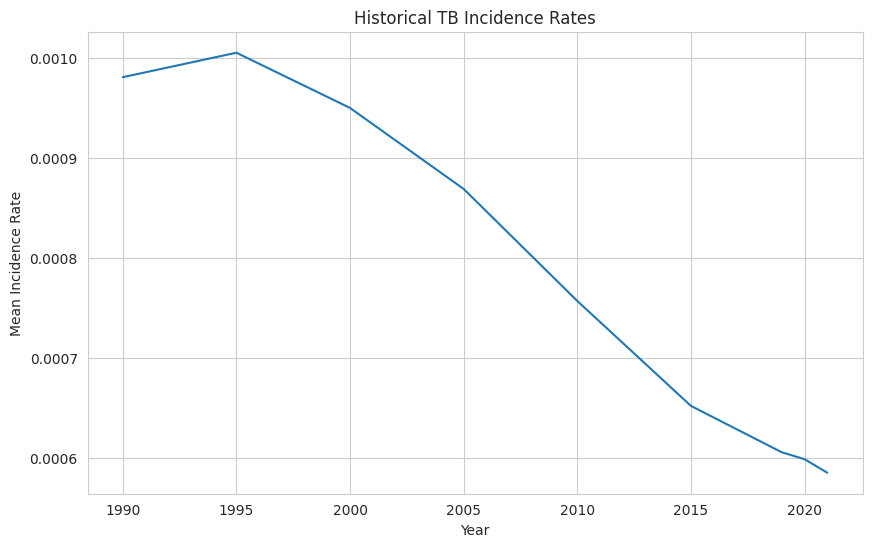

In [33]:
# Plot the historical data
plt.figure(figsize=(10, 6))
plt.plot(incidence_yearly, label='Historical Incidence Rates')
plt.xlabel('Year')
plt.ylabel('Mean Incidence Rate')
plt.title('Historical TB Incidence Rates')
plt.show()

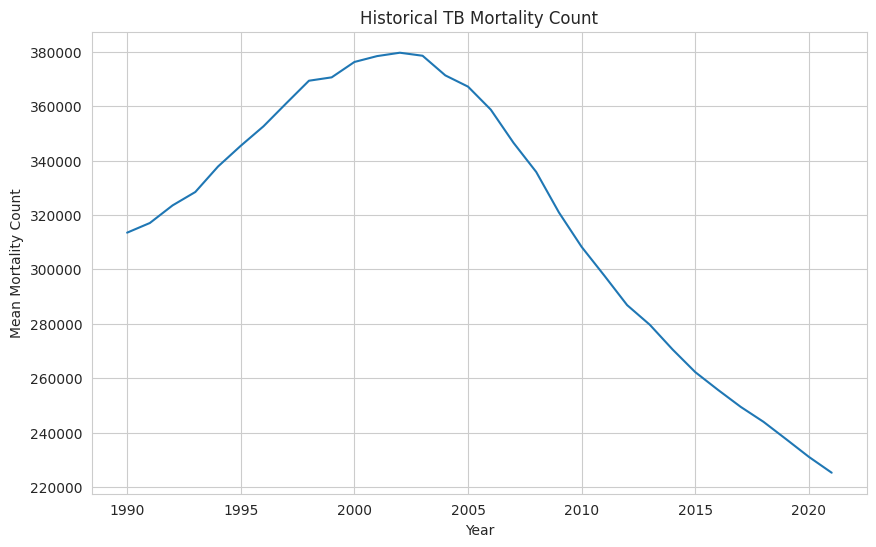

In [34]:
# Plot the historical data
plt.figure(figsize=(10, 6))
plt.plot(mortality_yearly, label='Historical Mortality Count')
plt.xlabel('Year')
plt.ylabel('Mean Mortality Count')
plt.title('Historical TB Mortality Count')
plt.show()

In [35]:
# Download pmdarima package
!pip install pmdarima

In [36]:
from pmdarima import auto_arima

# Find the optimal parameters for ARIMA model
model = auto_arima(incidence_yearly, seasonal=False, trace=True, stepwise=True)

# Train the model
model.fit(incidence_yearly)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-134.735, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-100.921, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-130.786, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-108.174, Time=0.32 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-119.570, Time=0.49 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-130.253, Time=0.62 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-96.921, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-133.019, Time=0.80 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-136.441, Time=0.67 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-132.639, Time=1.07 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-90.921, Time=0.31 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-92.921, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-120.284, Time=0.59 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-88.922, Time=0.62 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   :

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [37]:
# Find the optimal parameters for ARIMA model
model_mortality = auto_arima(mortality_yearly, seasonal=False, trace=True, stepwise=True)

# Train the model_mortality
model_mortality.fit(mortality_yearly)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=571.002, Time=0.73 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=567.353, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=567.918, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=568.408, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=565.700, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=566.977, Time=0.24 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.250 seconds


ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [38]:
# Print the identified best ARIMA model parameters (p, d, q)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:               SARIMAX(2, 0, 2)   Log Likelihood                  73.221
Date:                Tue, 09 Jul 2024   AIC                           -136.441
Time:                        13:41:20   BIC                           -135.455
Sample:                             0   HQIC                          -138.569
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3819      0.001   2249.963      0.000       1.381       1.383
ar.L2         -0.3823      0.001   -622.202      0.000      -0.384      -0.381
ma.L1       -2.47e-06   2.22e-09  -1113.968      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



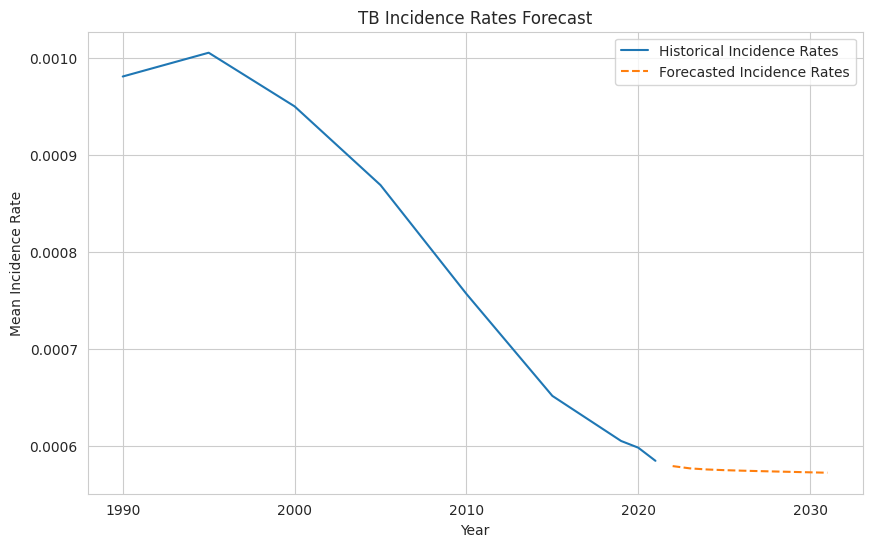

In [39]:
# Forecast the next 10 years
forecast = model.predict(n_periods=10)
forecast_years = range(incidence_yearly.index[-1] + 1, incidence_yearly.index[-1] + 1 + 10)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(incidence_yearly, label='Historical Incidence Rates')
plt.plot(forecast_years, forecast, label='Forecasted Incidence Rates', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Mean Incidence Rate')
plt.title('TB Incidence Rates Forecast')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



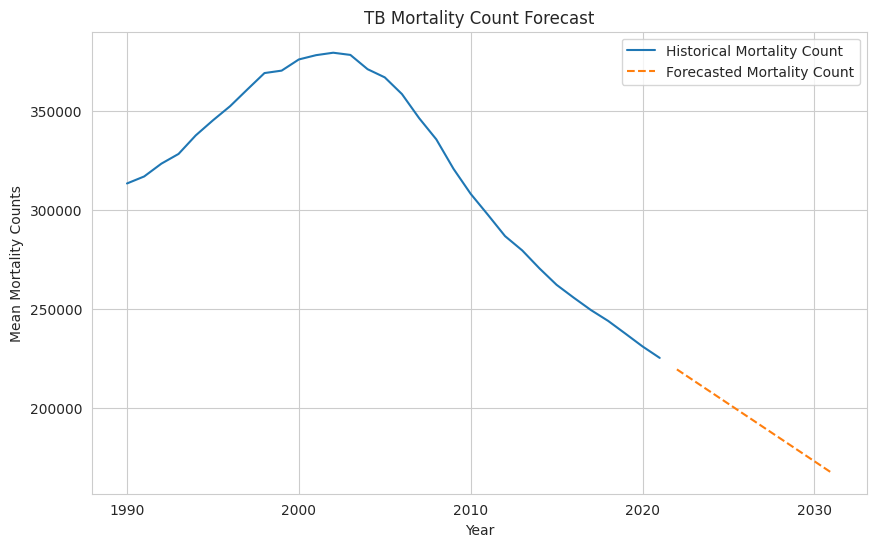

In [40]:
# Forecast the next 10 years
forecast_mortality = model_mortality.predict(n_periods=10)
forecast_years_mortality = range(mortality_yearly.index[-1] + 1, mortality_yearly.index[-1] + 1 + 10)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(mortality_yearly, label='Historical Mortality Count')
plt.plot(forecast_years_mortality, forecast_mortality, label='Forecasted Mortality Count', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Mean Mortality Counts')
plt.title('TB Mortality Count Forecast')
plt.legend()
plt.show()

In [41]:
incidence_data.head()

,age_group,sex_id,year_id,location_id,mean,lower,upper,inc_target,Sex,metric
0,15 to 49,1,1990,1,0.000903,0.000745,0.001086,0.000587,Male,incidence
1,15 to 49,1,1995,1,0.000959,0.000808,0.001137,0.000587,Male,incidence
2,15 to 49,1,2000,1,0.000958,0.000815,0.001141,0.000587,Male,incidence
3,15 to 49,1,2005,1,0.000923,0.000787,0.001102,0.000587,Male,incidence
4,15 to 49,1,2010,1,0.000815,0.000699,0.000978,0.000587,Male,incidence


In [42]:
# Encode categorical variables for global time trend data
label_encoders = {}
categorical_columns = ['age_group']

for column in categorical_columns:
    le = LabelEncoder()
    incidence_data[column] = le.fit_transform(incidence_data[column])
    label_encoders[column] = le

In [43]:
incidence_data.head()

,age_group,sex_id,year_id,location_id,mean,lower,upper,inc_target,Sex,metric
0,0,1,1990,1,0.000903,0.000745,0.001086,0.000587,Male,incidence
1,0,1,1995,1,0.000959,0.000808,0.001137,0.000587,Male,incidence
2,0,1,2000,1,0.000958,0.000815,0.001141,0.000587,Male,incidence
3,0,1,2005,1,0.000923,0.000787,0.001102,0.000587,Male,incidence
4,0,1,2010,1,0.000815,0.000699,0.000978,0.000587,Male,incidence


In [44]:
# Identify numerical features
numerical_features = ['age_group',	'sex_id',	'year_id',	'location_id',	'mean',	'lower',	'upper',	'inc_target']

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
incidence_data[numerical_features] = scaler.fit_transform(incidence_data[numerical_features])

# Display the first few rows of the transformed incidence_data
print(incidence_data.head())

   age_group  sex_id   year_id  location_id      mean     lower     upper  \
0   -1.46385    -1.0 -1.695723          0.0  0.288014  0.312404  0.261960   
1   -1.46385    -1.0 -1.233253          0.0  0.417352  0.491598  0.359084   
2   -1.46385    -1.0 -0.770783          0.0  0.414797  0.513095  0.365424   
3   -1.46385    -1.0 -0.308313          0.0  0.333502  0.431616  0.293302   
4   -1.46385    -1.0  0.154157          0.0  0.085831  0.182277  0.059448   

   inc_target   Sex     metric  
0    0.255332  Male  incidence  
1    0.255332  Male  incidence  
2    0.255332  Male  incidence  
3    0.255332  Male  incidence  
4    0.255332  Male  incidence  


In [45]:
# Define features and target
X = incidence_data.drop(columns=['mean', 'Sex', 'metric'])
y = incidence_data['mean']

In [46]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# AdaBoost
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Bagged Decision Trees
bagging_model = BaggingRegressor()
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# Hybrid Ensemble (Voting Regressor)
hybrid_model = VotingRegressor(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model)
])
hybrid_model.fit(X_train, y_train)
y_pred_hybrid = hybrid_model.predict(X_test)

In [48]:
# Function to evaluate model performance
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse

# Evaluate models
results = {
    'XGBoost': evaluate_model(y_test, y_pred_xgb),
    'AdaBoost': evaluate_model(y_test, y_pred_ada),
    'Random Forest': evaluate_model(y_test, y_pred_rf),
    'Bagged Trees': evaluate_model(y_test, y_pred_bagging),
    'Hybrid': evaluate_model(y_test, y_pred_hybrid)
}

# Display results
print("Modelling Based on Global Time Trend")
for model, metrics in results.items():
    print(f'{model} - MAE: {metrics[0]:.4f}, RMSE: {metrics[1]:.4f}')

Modelling Based on Global Time Trend
XGBoost - MAE: 0.0481, RMSE: 0.0714
AdaBoost - MAE: 0.0608, RMSE: 0.0765
Random Forest - MAE: 0.0263, RMSE: 0.0336
Bagged Trees - MAE: 0.0389, RMSE: 0.0554
Hybrid - MAE: 0.0302, RMSE: 0.0410


## 2.2 Forecast with Data Frame: Country Data

In [49]:
# Check the df_country info
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location_id     2040 non-null   int64  
 1   age_group_id    2040 non-null   int64  
 2   year_id         2040 non-null   int64  
 3   metric_name     2040 non-null   object 
 4   measure_name    2040 non-null   object 
 5   sex_id          2040 non-null   int64  
 6   mean            2040 non-null   float64
 7   lower           2040 non-null   float64
 8   upper           2040 non-null   float64
 9   age_group_name  2040 non-null   object 
 10  location_name   2040 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 175.4+ KB


<font color='lightpink'>Important Notes:</font> Since the `location_id` and `age_group_id` are based on the respective `age_group_name` and `location_name`. Thus we can ignore the categorical label encoding. On the other hand, we can drop the `year_id`, `metric_name` and `sex_id`, since they are all identical observation within the columns and do not carry any meaning.

In [50]:
# Identify numerical features
numerical_features = ['location_id', 'age_group_id', 'mean', 'lower', 'upper']

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
df_country[numerical_features] = scaler.fit_transform(df_country[numerical_features])

# Display the first few rows of the transformed df_country
print(df_country.head())

   location_id  age_group_id  year_id metric_name measure_name  sex_id  \
0    -1.330646     -1.988778     2021        rate    mortality       3   
1    -1.330646     -1.988778     2021        rate    incidence       3   
2    -1.330646      0.338515     2021        rate    mortality       3   
3    -1.330646      0.338515     2021        rate    incidence       3   
4    -1.330646      0.444301     2021        rate    mortality       3   

       mean     lower     upper age_group_name location_name  
0 -0.435515 -0.428774 -0.441854             <5         China  
1 -0.376832 -0.365501 -0.384086             <5         China  
2 -0.436873 -0.430179 -0.443198        5 to 14         China  
3 -0.399498 -0.395793 -0.401801        5 to 14         China  
4 -0.431993 -0.425156 -0.437926          15-49         China  


In [51]:
# Define features and target
X = df_country.drop(columns=['mean', 'metric_name', 'year_id', 'measure_name', 'sex_id', 'age_group_name', 'location_name'])
y = df_country['mean']

In [52]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# AdaBoost
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Bagged Decision Trees
bagging_model = BaggingRegressor()
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# Hybrid Ensemble (Voting Regressor)
hybrid_model = VotingRegressor(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model)
])
hybrid_model.fit(X_train, y_train)
y_pred_hybrid = hybrid_model.predict(X_test)

In [54]:
# Function to evaluate model performance
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse

# Evaluate models
results = {
    'XGBoost': evaluate_model(y_test, y_pred_xgb),
    'AdaBoost': evaluate_model(y_test, y_pred_ada),
    'Random Forest': evaluate_model(y_test, y_pred_rf),
    'Bagged Trees': evaluate_model(y_test, y_pred_bagging),
    'Hybrid': evaluate_model(y_test, y_pred_hybrid)
}

# Display results
print("Modelling Based on Country Data")
for model, metrics in results.items():
    print(f'{model} - MAE: {metrics[0]:.4f}, RMSE: {metrics[1]:.4f}')

Modelling Based on Country Data
XGBoost - MAE: 0.0163, RMSE: 0.1033
AdaBoost - MAE: 0.0962, RMSE: 0.1134
Random Forest - MAE: 0.0104, RMSE: 0.0408
Bagged Trees - MAE: 0.0115, RMSE: 0.0452
Hybrid - MAE: 0.0125, RMSE: 0.0634


## 2.3 Forecast with Data Frame: Mortality Risk

In [55]:
# Check the df_risk data frame
df_risk.head()

,location_name,location_type,age_group_name,location_id,mort_2015_count_mean,mort_2015_count_lower,mort_2015_count_upper,mort_2021_count_mean,mort_2021_count_lower,mort_2021_count_upper,...,rmv_upper_smoking,rmv_mean_alcohol,rmv_lower_alcohol,rmv_upper_alcohol,rmv_mean_diabetes,rmv_lower_diabetes,rmv_upper_diabetes,rmv_mean_all_risk,rmv_lower_all_risk,rmv_upper_all_risk
0,Global,global,All Ages,1,1.575213e+06,1.452860e+06,1.697411e+06,1.368210e+06,1.244993e+06,1.536771e+06,...,1.394632e+06,1.232482e+06,886424.1432,1.560003e+06,1.220031e+06,1.101365e+06,1.393987e+06,986655.0202,697402.42430,1.225183e+06
1,Global,global,15-49 years,1,5.927200e+05,5.336074e+05,6.500239e+05,4.919816e+05,4.395550e+05,5.466225e+05,...,4.993489e+05,4.432311e+05,320822.6459,5.638332e+05,4.816657e+05,4.298471e+05,5.365812e+05,400143.2928,292322.28660,4.980396e+05
2,Global,global,50-69 years,1,4.972750e+05,4.661338e+05,5.265154e+05,4.503313e+05,4.064675e+05,5.127262e+05,...,4.490431e+05,3.957861e+05,258953.9354,5.262099e+05,3.913307e+05,3.518403e+05,4.520796e+05,291664.4140,186077.85360,3.861404e+05
3,Global,global,70+ years,1,3.471596e+05,3.223117e+05,3.684045e+05,3.429330e+05,3.122226e+05,3.928769e+05,...,3.510116e+05,3.105013e+05,218761.8396,3.955342e+05,2.640714e+05,2.384060e+05,3.222473e+05,211883.7906,137207.08160,2.731437e+05
4,"Southeast Asia, East Asia, and Oceania",superregion,All Ages,4,2.655287e+05,2.479678e+05,2.862395e+05,2.352683e+05,2.152546e+05,2.781593e+05,...,2.243927e+05,2.098368e+05,145521.6424,2.843888e+05,2.039574e+05,1.851880e+05,2.407046e+05,146988.4230,98981.12388,2.037733e+05


<font color='lightpink'>Important Notes:</font> `location_name` is equivalent to the `location_id`. We can either encode the `location_name` or just use the `location_id` for modelling.

In [56]:
# Encode categorical variables in mortality risk data frame
label_encoders = {}
categorical_columns = ['location_type', 'age_group_name']

for column in categorical_columns:
    le = LabelEncoder()
    df_risk[column] = le.fit_transform(df_risk[column])
    label_encoders[column] = le

In [57]:
# Check the data frame
df_risk.head()

,location_name,location_type,age_group_name,location_id,mort_2015_count_mean,mort_2015_count_lower,mort_2015_count_upper,mort_2021_count_mean,mort_2021_count_lower,mort_2021_count_upper,...,rmv_upper_smoking,rmv_mean_alcohol,rmv_lower_alcohol,rmv_upper_alcohol,rmv_mean_diabetes,rmv_lower_diabetes,rmv_upper_diabetes,rmv_mean_all_risk,rmv_lower_all_risk,rmv_upper_all_risk
0,Global,1,3,1,1.575213e+06,1.452860e+06,1.697411e+06,1.368210e+06,1.244993e+06,1.536771e+06,...,1.394632e+06,1.232482e+06,886424.1432,1.560003e+06,1.220031e+06,1.101365e+06,1.393987e+06,986655.0202,697402.42430,1.225183e+06
1,Global,1,0,1,5.927200e+05,5.336074e+05,6.500239e+05,4.919816e+05,4.395550e+05,5.466225e+05,...,4.993489e+05,4.432311e+05,320822.6459,5.638332e+05,4.816657e+05,4.298471e+05,5.365812e+05,400143.2928,292322.28660,4.980396e+05
2,Global,1,1,1,4.972750e+05,4.661338e+05,5.265154e+05,4.503313e+05,4.064675e+05,5.127262e+05,...,4.490431e+05,3.957861e+05,258953.9354,5.262099e+05,3.913307e+05,3.518403e+05,4.520796e+05,291664.4140,186077.85360,3.861404e+05
3,Global,1,2,1,3.471596e+05,3.223117e+05,3.684045e+05,3.429330e+05,3.122226e+05,3.928769e+05,...,3.510116e+05,3.105013e+05,218761.8396,3.955342e+05,2.640714e+05,2.384060e+05,3.222473e+05,211883.7906,137207.08160,2.731437e+05
4,"Southeast Asia, East Asia, and Oceania",4,3,4,2.655287e+05,2.479678e+05,2.862395e+05,2.352683e+05,2.152546e+05,2.781593e+05,...,2.243927e+05,2.098368e+05,145521.6424,2.843888e+05,2.039574e+05,1.851880e+05,2.407046e+05,146988.4230,98981.12388,2.037733e+05


In [58]:
# Identify numerical features
numerical_columns = df_risk.select_dtypes(include=['float64', 'int64']).columns

# Scale numerical features
scaler = StandardScaler()
df_risk[numerical_columns] = scaler.fit_transform(df_risk[numerical_columns])

In [59]:
# Define features and target
X = df_risk.drop(columns=['location_name', 'mort_2021_count_mean'])
y = df_risk['mort_2021_count_mean']

In [60]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# AdaBoost
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Bagged Decision Trees
bagging_model = BaggingRegressor()
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# Hybrid Ensemble (Voting Regressor)
hybrid_model = VotingRegressor(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model)
])
hybrid_model.fit(X_train, y_train)
y_pred_hybrid = hybrid_model.predict(X_test)

In [62]:
# Function to evaluate model performance
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse

# Evaluate models
results = {
    'XGBoost': evaluate_model(y_test, y_pred_xgb),
    'AdaBoost': evaluate_model(y_test, y_pred_ada),
    'Random Forest': evaluate_model(y_test, y_pred_rf),
    'Bagged Trees': evaluate_model(y_test, y_pred_bagging),
    'Hybrid': evaluate_model(y_test, y_pred_hybrid)
}

# Display results
print("Modelling Based on Mortality Risk Data")
for model, metrics in results.items():
    print(f'{model} - MAE: {metrics[0]:.4f}, RMSE: {metrics[1]:.4f}')

Modelling Based on Mortality Risk Data
XGBoost - MAE: 0.0075, RMSE: 0.0414
AdaBoost - MAE: 0.0519, RMSE: 0.0924
Random Forest - MAE: 0.0041, RMSE: 0.0202
Bagged Trees - MAE: 0.0052, RMSE: 0.0263
Hybrid - MAE: 0.0054, RMSE: 0.0291
